# A T dwarf and a z=5.4 quasar in SPHEREX

We will explore the SPHEREX data of one of the brown dwarfs and the quasar presented here:  

https://ui.adsabs.harvard.edu/abs/2025MNRAS.542.1088B/abstract 

In [5]:
#make plots inline
%matplotlib inline

#import libraries to be used astropy Skycoord
from astropy.coordinates import SkyCoord
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits, ascii


In [3]:
# quasar coordinates 181530.01+652054.0
quasar_coord = SkyCoord(ra='18h15m30.01s', dec='+65d20m54.0s', frame='icrs') 
#t7-dwarf coordinates 
t7coord= SkyCoord(266.48504594044346*u.deg, 64.99357419863573*u.deg, frame='icrs')
#t-3 dwarf coordinates J002516.31−491618.5 
t3coord = SkyCoord("00h25m16.31s", "-49d16m18.5s", frame='icrs')


In [7]:
#save coordinates to a csv file using astropy ascii to upload to SPHEREX spectrophotometry tool
#add a column wiht a name for each object
data = Table()
data['name'] = ['quasar_1815+6520', 't7_dwarf', 't3_dwarf']
data['ra'] = [quasar_coord.ra.deg, t7coord.ra.deg, t3coord.ra.deg]
data['dec'] = [quasar_coord.dec.deg, t7coord.dec.deg, t3coord.dec.deg]
ascii.write(data, 'tdwarf_quasar_coords.csv', overwrite=True, format='csv')



I uploaded the file above to:

https://irsa.ipac.caltech.edu/applications/spherex/tool-spectrophotometry

At 9:18 am.

Let's see how long that takes. 



For reference, here are the quasar and T-dwarfs as seen by Euclid:

#Quasar from Banados+2025
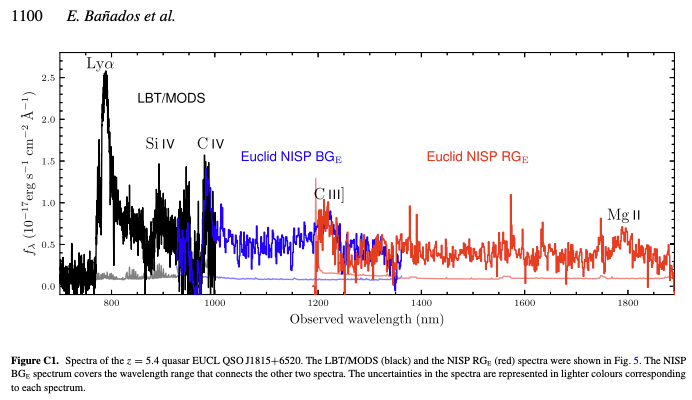

## ~2 months old SPHEREX version:

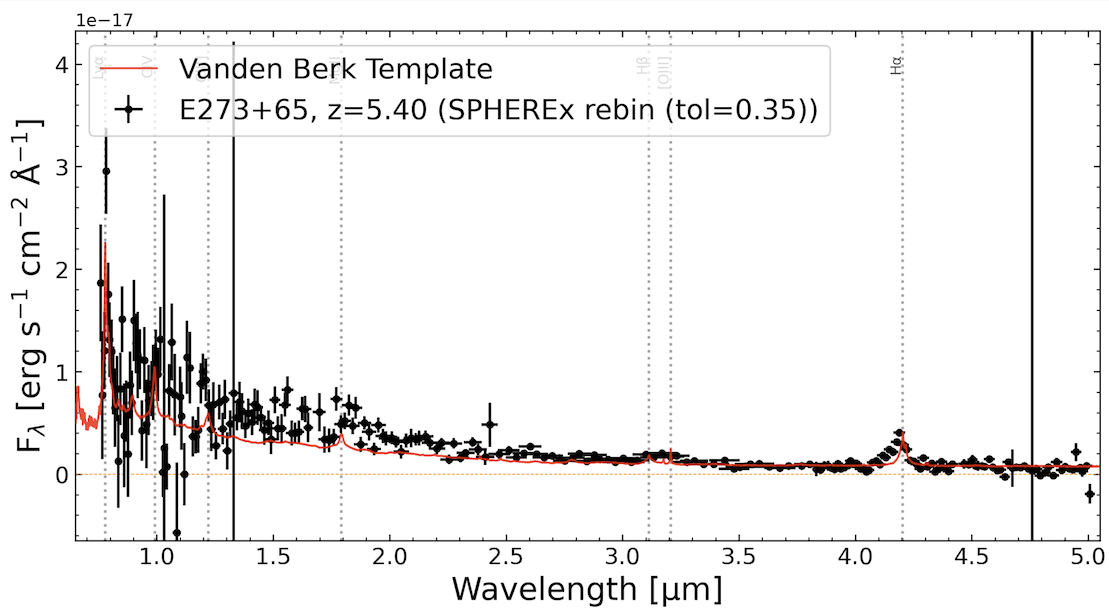

# T3 from Banados+25
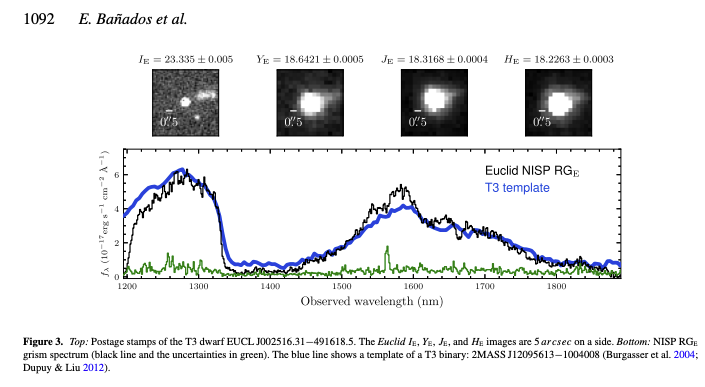

# 2 months old SPHEREx version
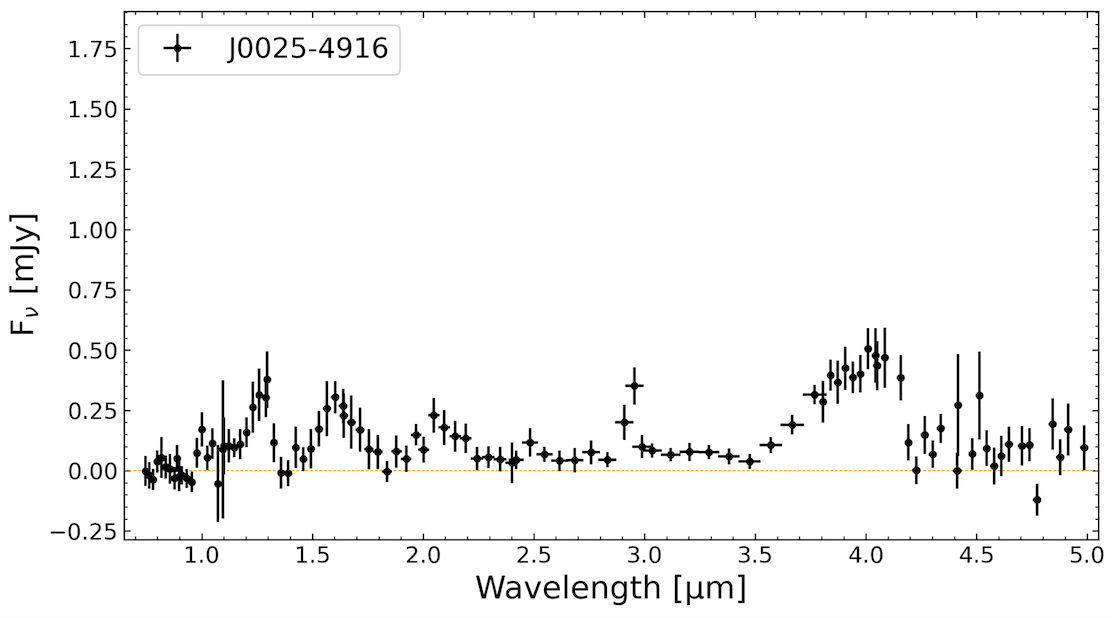

#T7 dwarf - not included in Banados+25 but discussed in https://ui.adsabs.harvard.edu/abs/2025arXiv250322559M/abstract
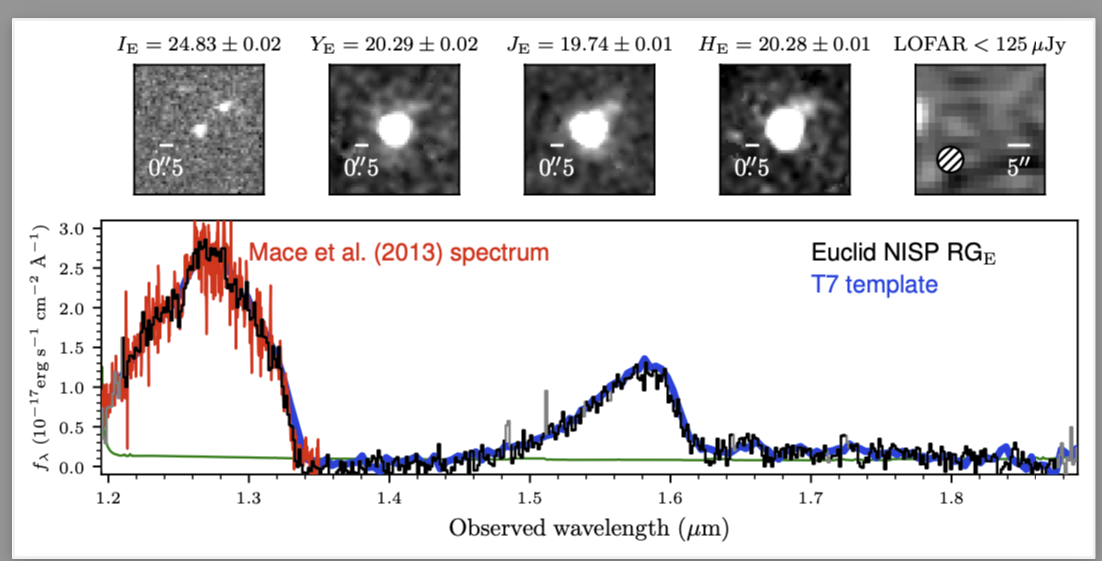

## 2 month old SPHEREx version
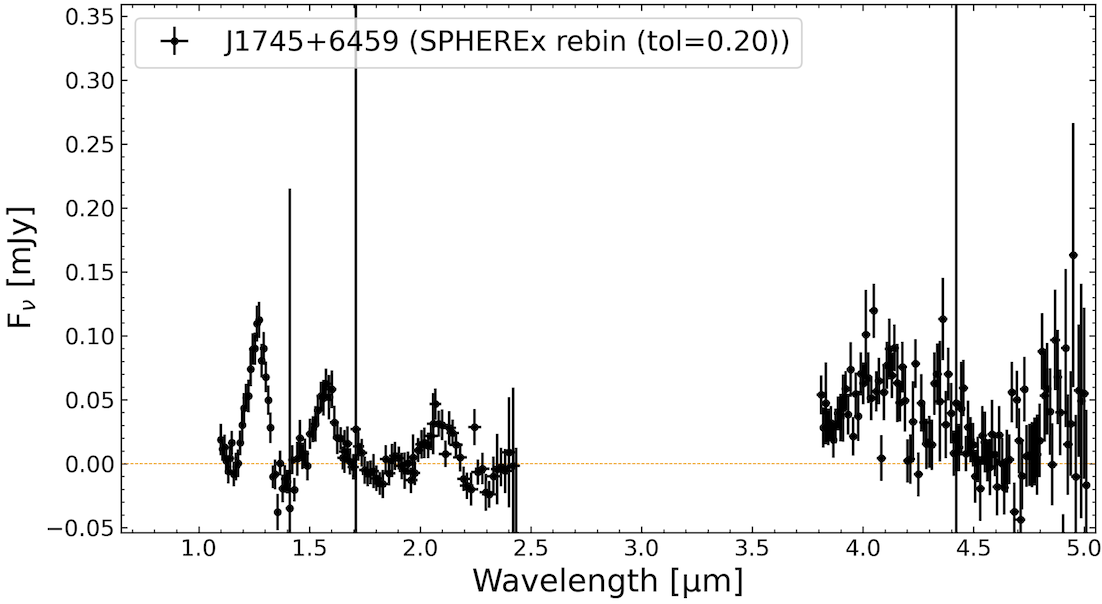

# The spectrophotometry tool is taking forever so I'll do it the hacky way

`python ../get_cutouts_spherex.py -i tdwarf_quasar_coords.csv --output_dir example_cutouts/ --delimiter , --cutout`



You then sould be able to do this to get the spectrum:

`python extract_spherex_photometry.py --name quasar_1815+6520 --redshift 5.4  --directory example_notebooks/example_cutouts/ --show_template vandenberk01 --show_rebin_spherex 0.05`


However, it fails now that they have updated the format this does not work and it needs some code rewrtiting